# Covid Time Series Analysis

### Author: Jarren Javier - 6/25/21

In [25]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## 1) Exploratory Data Analysis

In [26]:
df = pd.read_csv("United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")

In [27]:
df.head(3)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,1/22/20,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/20 16:22,Agree,Agree
1,1/23/20,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/20 16:22,Agree,Agree
2,1/24/20,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/20 16:22,Agree,Agree


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16020 entries, 0 to 16019
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   submission_date  16020 non-null  object
 1   state            16020 non-null  object
 2   tot_cases        16020 non-null  object
 3   conf_cases       5566 non-null   object
 4   prob_cases       5566 non-null   object
 5   new_case         16020 non-null  object
 6   pnew_case        10756 non-null  object
 7   tot_death        16020 non-null  object
 8   conf_death       5923 non-null   object
 9   prob_death       5923 non-null   object
 10  new_death        16020 non-null  object
 11  pnew_death       10754 non-null  object
 12  created_at       16020 non-null  object
 13  consent_cases    13083 non-null  object
 14  consent_deaths   13350 non-null  object
dtypes: object(15)
memory usage: 1.8+ MB


All the data types are incorrectly set as objects. I need change to the correct data types in the data cleaning process.

In [29]:
df.isnull().sum()

submission_date        0
state                  0
tot_cases              0
conf_cases         10454
prob_cases         10454
new_case               0
pnew_case           5264
tot_death              0
conf_death         10097
prob_death         10097
new_death              0
pnew_death          5266
created_at             0
consent_cases       2937
consent_deaths      2670
dtype: int64

## 1a) Data Wrangling

In [30]:
#remove commas from numeric values
df.replace(',','', regex=True, inplace=True)

In [31]:
#get first and last numeric column index location
print(df.columns.get_loc("tot_death"), '- total death')
print(df.columns.get_loc("pnew_death"), '- pnew death')

7 - total death
11 - pnew death


In [32]:
#convert all the numeric columns to correct data type
#using index
print(df.columns[2:12])

for col in df.columns[2:12]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Index(['tot_cases', 'conf_cases', 'prob_cases', 'new_case', 'pnew_case',
       'tot_death', 'conf_death', 'prob_death', 'new_death', 'pnew_death'],
      dtype='object')


In [33]:
#convert dates to correct data type
df['submission_date'] = pd.to_datetime(df['submission_date'],format='%m/%d/%y' )

In [34]:
#convert state to string
df['state'] = df['state'].astype('string')

In [43]:
#check for count of new cases with negative amount of new cases
df[df.new_case <= -1].count()

submission_date    79
state              79
tot_cases          79
conf_cases         37
prob_cases         37
new_case           79
pnew_case          76
tot_death          79
conf_death         37
prob_death         37
new_death          79
pnew_death         76
created_at         79
consent_cases      71
consent_deaths     66
dtype: int64

In [44]:
#get indexes of new cases with negative values
print(df[df.new_case <= -1].index)

Int64Index([  376,   381,   394,  1194,  1277,  1953,  2070,  2795,  3011,
             3025,  4211,  4655,  4659,  4662,  4667,  4670,  4672,  4681,
             5166,  5169,  5173,  5189,  5191,  5212,  7446,  7655,  7892,
             8105,  8387,  8392,  8394,  8523,  8973,  9186,  9553,  9688,
            10619, 11197, 11373, 11376, 11386, 11399, 11431, 11435, 11584,
            11639, 12222, 12262, 12898, 13238, 13267, 13284, 13302, 13721,
            13724, 13974, 13975, 13979, 13981, 13986, 13990, 13997, 14005,
            14030, 14038, 14146, 14150, 14528, 14533, 14565, 14642, 14652,
            14655, 14791, 14797, 14826, 15040, 15209, 15210],
           dtype='int64')


In [45]:
#drop rows with negative new covid cases
df = df.drop([  376,   381,   394,  1194,  1277,  1953,  2070,  2795,  3011,
             3025,  4211,  4655,  4659,  4662,  4667,  4670,  4672,  4681,
             5166,  5169,  5173,  5189,  5191,  5212,  7446,  7655,  7892,
             8105,  8387,  8392,  8394,  8523,  8973,  9186,  9553,  9688,
            10619, 11197, 11373, 11376, 11386, 11399, 11431, 11435, 11584,
            11639, 12222, 12262, 12898, 13238, 13267, 13284, 13302, 13721,
            13724, 13974, 13975, 13979, 13981, 13986, 13990, 13997, 14005,
            14030, 14038, 14146, 14150, 14528, 14533, 14565, 14642, 14652,
            14655, 14791, 14797, 14826, 15040, 15209, 15210])

In [46]:
#check for change 
print(df[df.new_case <= -1].index)

Int64Index([], dtype='int64')


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15941 entries, 0 to 16019
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  15941 non-null  datetime64[ns]
 1   state            15941 non-null  string        
 2   tot_cases        15941 non-null  int64         
 3   conf_cases       5529 non-null   float64       
 4   prob_cases       5529 non-null   float64       
 5   new_case         15941 non-null  int64         
 6   pnew_case        10680 non-null  float64       
 7   tot_death        15941 non-null  int64         
 8   conf_death       5886 non-null   float64       
 9   prob_death       5886 non-null   float64       
 10  new_death        15941 non-null  int64         
 11  pnew_death       10678 non-null  float64       
 12  created_at       15941 non-null  object        
 13  consent_cases    13012 non-null  object        
 14  consent_deaths   13284 non-null  objec

### Analysis

All the data types were objects and required conversion to proper numeric and date data types.  The columns needed for analysis(total cases, state, submission date, new cases, and total deaths) do not have NaN values. There is no need to replace the NaN values. In total there are 15 columns and 16020 data entries. There were 79 instances of rows with negative new cases. These were removed as there cannot be a negative amount of new cases.

## 2) Descriptive Statistics

In [48]:
#what are the top 20 states for total covid cases?

In [49]:
#get max total covid cases by state top 20
top_20 = df[['state','tot_cases']].groupby('state').max().sort_values(by='tot_cases', ascending=False).head(20)


In [90]:
#top 20 total cases by state
top_20

,tot_cases
state,
CA,855072
TX,805082
FL,732399
GA,334601
IL,330643
NYC,253313
NC,236407
AZ,227635
NY,226174


In [51]:
top_20.index

Index(['CA', 'TX', 'FL', 'GA', 'IL', 'NYC', 'NC', 'AZ', 'NY', 'TN', 'NJ', 'LA',
       'PA', 'OH', 'AL', 'WI', 'VA', 'SC', 'MI', 'MO'],
      dtype='object', name='state')

In [52]:
top_20_states = ['CA', 'TX', 'FL', 'GA', 'IL', 'NYC', 'NC', 'AZ', 'NY', 'TN', 'NJ', 'LA',
       'PA', 'OH', 'AL', 'WI', 'VA', 'SC', 'MI', 'MO']
filt_20 = df['state'].isin(top_20_states)

In [91]:
#decsriptive stats for top 20 states
df.loc[filt_20,['tot_cases','new_case','tot_death']].describe()

,tot_cases,new_case,tot_death
count,5318.00,5318.00,5318.00
mean,101895.93,1123.00,3670.42
std,145420.55,1737.04,5195.44
min,0.00,0.00,0.00
25%,1914.50,119.25,29.00
50%,51742.00,582.50,1504.50
75%,149394.25,1330.50,5340.00
max,855072.00,17844.00,23915.00


Text(0, 0.5, 'Total Cases')

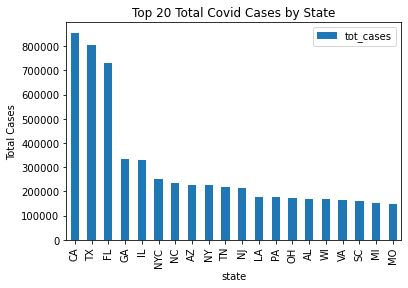

In [54]:
#top 20 states by total cases, bar chart
top_20.plot.bar()
plt.title("Top 20 Total Covid Cases by State")
plt.ylabel("Total Cases")

In [82]:
#Create USA dataframe, group on date
USA_df = df.groupby(pd.Grouper(key='submission_date', axis=0, 
                      freq='2D', sort=True)).sum()
USA_df.head(5)

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
submission_date,,,,,,,,,,
2020-01-22,2,0.00,0.00,1,0.00,0,0.00,0.00,0,0.00
2020-01-24,4,0.00,0.00,1,0.00,0,0.00,0.00,0,0.00
2020-01-26,10,0.00,0.00,3,0.00,0,0.00,0.00,0,0.00
2020-01-28,10,0.00,0.00,0,0.00,0,0.00,0.00,0,0.00
2020-01-30,12,0.00,0.00,2,0.00,0,0.00,0.00,0,0.00


In [79]:
#descriptive statistics for USA_df
pd.set_option('display.float_format', lambda x: '%.2f' % x)
USA_df[['tot_cases','new_case','tot_death']].describe()

,tot_cases,new_case,tot_death
count,134.00,134.00,134.00
mean,5285781.46,59304.85,188829.80
std,5084981.86,40817.46,149653.05
min,2.00,0.00,0.00
25%,285077.75,35632.25,5003.50
50%,3611033.00,59389.50,202545.50
75%,9836700.50,91395.50,320255.75
max,15622555.00,146755.00,429640.00


### Analysis

The top 20 states the average amount of total cases(101895), new cases(1123), and the total amount of deaths(3670) by day. Compared to the aggergated totals by date for the U.S. as a whole, average amount of total cases(5285781), new cases(59304), and the total amount of deaths(188829) by day. The bar chart shows that the top 3 states with total covid cases are Florida, Texas, and California by a long shot. These states total cases are over 70,000+.

## 3) Trend Analysis for Top 3 States and USA

In [57]:
#Florida
FL_df = df.loc[df['state'] == "FL"]
FL_df.set_index('submission_date', inplace = True)

In [58]:
#Texas
TX_df = df.loc[df['state'] == "TX"]
TX_df.set_index('submission_date', inplace = True)

In [59]:
#California
CA_df = df.loc[df['state'] == "CA"]
CA_df.set_index('submission_date', inplace = True)


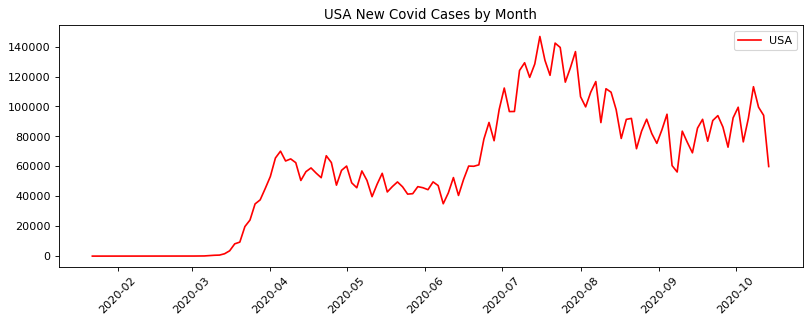

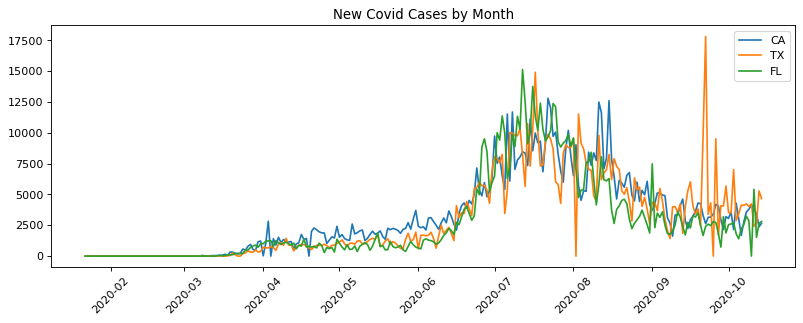

In [86]:
#time series of top 3 states and USA

#USA
figure(figsize=(12, 4), dpi=80)
plt.plot(USA_df[['new_case']],color ='red')
plt.legend(['USA'])
plt.xticks(rotation = 45)
plt.title("USA New Covid Cases by Month")
plt.show()

#top 3 CA, TX, FL
figure(figsize=(12, 4), dpi=80)

plt.plot(CA_df[['new_case']])
plt.plot(TX_df[['new_case']])
plt.plot(FL_df[['new_case']])


plt.legend(['CA','TX','FL'])
plt.xticks(rotation = 45)
plt.title("New Covid Cases by Month")
plt.show()

The amount of new covid cases by month for the USA started rising during mid March and stayed between 40,000 and 70,000 cases. From July to August, the USA saw the greatest spike of new cases per day at 50,000 and peaking at over 140,000 new cases. After reaching the peak amount of new cases, there was a steady decline up until October where cases began to rise again.<br>

The top 3 states with new cases, Florida, Texas, and California, all had a similar trend of the amount of new cases. All three states saw steady increases in new cases from June to to mid July, peaking at 15,000. There was a steady decrease for all three states. Intrestingly, Texas saw a major decrease in new cases at the start of August and had a huge spike of cases towards the begining of October.

##  4) Weekly Rolling Average for New Covid Cases U.S.

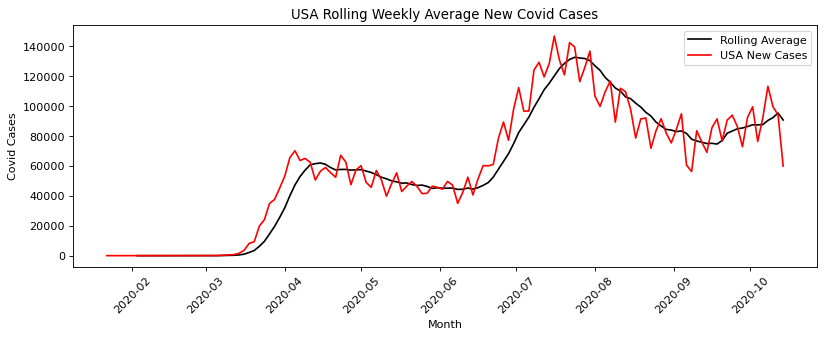

In [93]:
USA_New_Case = USA_df[['new_case']]

figure(figsize=(12, 4), dpi=80)
plt.plot(USA_New_Case.rolling(7).mean(),color= "black")
plt.plot(USA_df[['new_case']],color ='red')
plt.legend(['USA'])
plt.xticks(rotation = 45)
plt.title("USA Rolling Weekly Average New Covid Cases")
plt.legend(['Rolling Average','USA New Cases'])
plt.xlabel("Month")
plt.ylabel("Covid Cases")
plt.show()

The above graph of the rolling weekly average of new cases vs the total new USA cases shows a near identical trend. There was a huge increase of new cases from March to April. From April to mid June, the amount of new cases remained close to 50,000 cases. From Mid June there was a dramatic increase in new cases, peaking at just under 140,000 average cases in Augst. There was a  steady decrease in new cases after the peak and stayed between 80,000 and 100,000. using a rolling weekly average gave the ability to see a smoother time series anylsis of the new cases in the U.S.

## 5) Concluding Remarks

The time series analysis of new cases for the top 3 states surprisingly followed the same trend of increasing cases as well as decreases with the exception of Texas having a huge spike in October. The rolling weekly average followed the trend of total new cases for the U.S. but provides a smoother depiction without the major fluctuations in values.

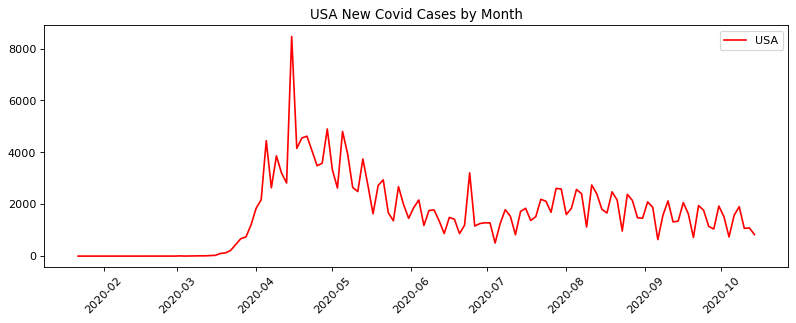

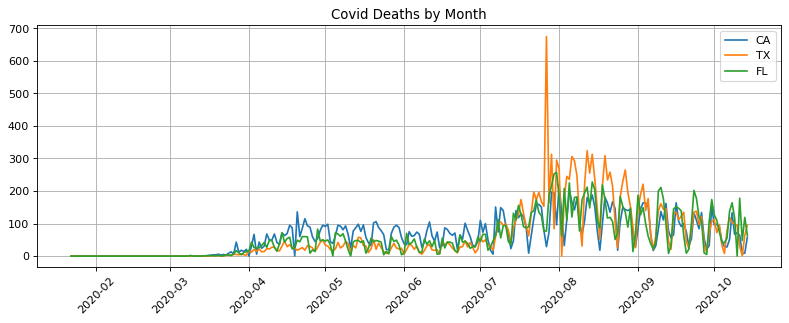

In [27]:
#USA
figure(figsize=(12, 4), dpi=80)
plt.plot(USA_df[['new_death']],color ='red')
plt.legend(['USA'])
plt.xticks(rotation = 45)
plt.title("USA New Covid Deaths by Month")
plt.show()

figure(figsize=(12, 4), dpi=80)

plt.plot(CA_df[['new_death']])
plt.plot(TX_df[['new_death']])
plt.plot(FL_df[['new_death']])

plt.legend(['CA','TX','FL'])
plt.xticks(rotation = 45)
plt.title("Covid Deaths by Month")
plt.grid()
plt.show()